In [1]:
import sys, os
sys.path.append(os.path.abspath(r"C:\Users\Rahil\Documents\spire-neurips2025"))


In [2]:
import torch
from src.models.spire_model import SPIRE
from src.train import train_spire_3Region
from src.evaluate import evaluate_spire_3Region

In [3]:
# === Generate synthetic paired data
def generate_synthetic_data(n_segments=100, channels=10, time=244):
    gpi = torch.randn(n_segments, time, channels)
    stn = torch.randn(n_segments, time, channels)
    thal = torch.randn(n_segments, time, channels)
    return gpi, stn, thal

C:\Users\Rahil\Documents\spire-neurips2025\src\train.py:213: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()#Prevents underflow during backprop
C:\Users\Rahil\Documents\spire-neurips2025\src\train.py:226: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/50 | Train Loss: 4.0429 | LR: 0.001000
✅ New best model saved at epoch 1
✅ New best model saved at epoch 2
✅ New best model saved at epoch 3
✅ New best model saved at epoch 4
✅ New best model saved at epoch 5
✅ New best model saved at epoch 6
✅ New best model saved at epoch 7
✅ New best model saved at epoch 8
✅ New best model saved at epoch 9
✅ New best model saved at epoch 10
Epoch 11/50 | Train Loss: 2.1935 | LR: 0.001000
✅ New best model saved at epoch 11
✅ New best model saved at epoch 12
✅ New best model saved at epoch 13
✅ New best model saved at epoch 14
✅ New best model saved at epoch 15
✅ New best model saved at epoch 16
✅ New best model saved at epoch 17
✅ New best model saved at epoch 18
✅ New best model saved at epoch 19
✅ New best model saved at epoch 20
Epoch 21/50 | Train Loss: 1.2945 | LR: 0.001000
✅ New best model saved at epoch 21
✅ New best model saved at epoch 22
✅ New best model saved at epoch 23
✅ New best model saved at epoch 24
✅ New best model saved at 

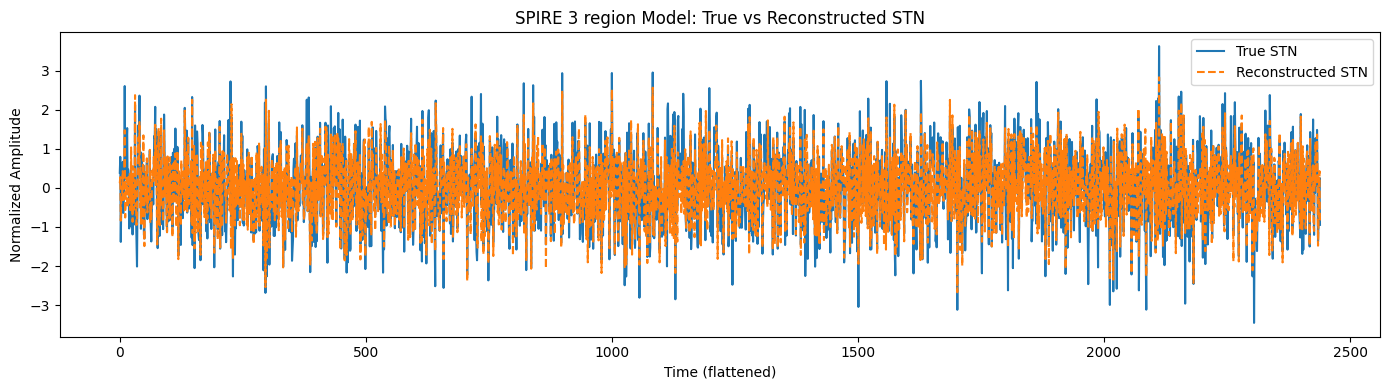

📊 Validation MSE: 0.2263
📈 Validation R² Score: 0.7650


In [4]:
gpi, stn, thal = generate_synthetic_data() # this is replaced by our process of loading data, filtering, segmentation and augmenting data with lag, and then splitting data into train and test

# === Train the model
model, val_loader, device = train_spire_3Region(
    gpi, stn, thal,
    shared_dim=3,
    private_dim=5,
    run_name="demo_synthetic",
    num_epochs=50,
    batch_size=8
)

# === Evaluate
evaluate_spire_3Region(model, val_loader, device)